In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
import compute_S_rate
import auxiliary_functions
import seaborn
import math

import networkx as nx

import auxiliary_functions

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
sbm = auxiliary_functions.stochastic_block_model(num_blocks=3, block_sizes=[50, 500, 1000], p_within_block=0.03, q_between_blocks=0.001)
sbm_adj = nx.adjacency_matrix(sbm)

In [3]:
T = auxiliary_functions.Discrete_RW_T(sbm_adj)
times = [1, 2, 3, 5, 8, 10, 15, 20, 25, 35]

In [4]:
list_powerT = []
for t in times:
    power_T = np.linalg.matrix_power(T, t)
    list_powerT.append(power_T)

In [5]:
n_edges = sbm_adj.toarray().sum() / 2
degrees = sbm_adj.toarray().sum(0)
pi_0 = degrees / (2*n_edges)

list_H_sbm = [0]
list_rows_entropies = []
for t in times:
    power_T = np.linalg.matrix_power(T, t)
    logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
    powTlogpowTdata = power_T * logpowTdata
    rows_entropies = -np.sum(powTlogpowTdata, axis=1)
    list_rows_entropies.append(rows_entropies)
    H_sbm = np.dot(pi_0, rows_entropies)
    print(H_sbm)
    list_H_sbm.append(H_sbm)

3.3089907772860734
6.046835765361201
6.843576740172714
7.041750835130124
7.123871517023653
7.158463038776872
7.210962590202945
7.237069705634359
7.250307642802494
7.260475446039711


In [6]:
purple = "#5e2b97"
green = "#009688"
brown = "#C77025"
orange = "#FFA500"

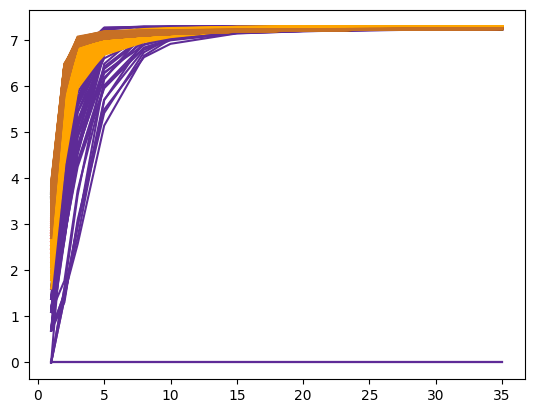

In [9]:
rows = np.array(list_rows_entropies)

colours = [purple]*50 + [orange]*500 + [brown]*1000
fig, ax = plt.subplots(1,1)
ax.plot(times, rows)
for i,line in enumerate(ax.lines):
    line.set_color(colours[i])

plt.savefig('/home/b/skoove/Desktop/plots_entropy/conditional_entropySBM.png', format='png', dpi=300)
plt.show()